In [65]:
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

# JAS comaprison

In [66]:
path = '/home/links/ct715/eddy_feedback/chapter1/annular_modes/data'
efp_data = path + '/efp/EFP_NH_SH_PAMIP_11.csv'
sam_data = path + '/pamip_misc/pc1_variance_JAS.csv'

efp = pd.read_csv(efp_data)
sam = pd.read_csv(sam_data)

# Merge the DataFrames on the 'model' column
merged_df_sam = pd.merge(sam, efp, left_on='model', right_on='Model')

# Select only the columns you want: model, variance, and SH Feedback (JAS)
result_df_sam = merged_df_sam[['model', 'variance', 'SH Feedback (JAS)']]
df_sam = result_df_sam.rename(columns={'SH Feedback (JAS)': 'SH_Feedback_JAS', 'variance': 'sam_variance'})
df_sam

,model,sam_variance,SH_Feedback_JAS
0,CESM2,297.06,0.3419
1,CNRM-CM6-1,232.99,0.2082
2,CanESM5,138.52,0.4618
3,EC-EARTH3,471.31,0.3135
4,FGOALS-f3-L,92.52,0.1274
5,HadGEM3-GC31-LL,201.83,0.2951
6,HadGEM3-GC31-MM,549.04,0.3002
7,IPSL-CM6A-LR,248.92,0.1959
8,MIROC6,193.18,0.3253
9,NorESM2-LM,145.07,0.3754


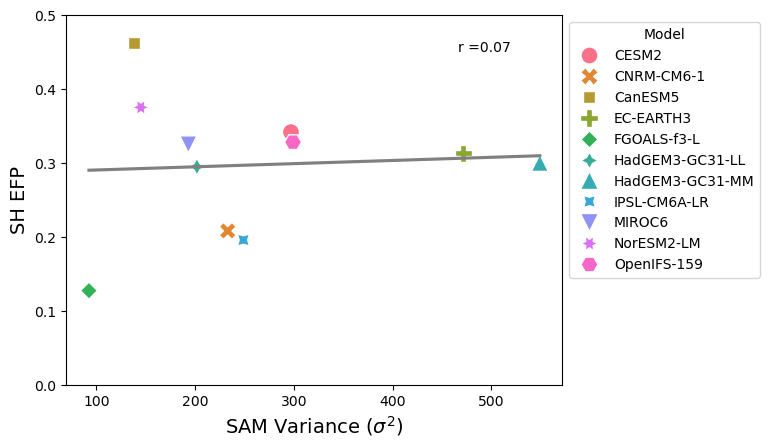

In [67]:
sns.regplot(data=df_sam, y='SH_Feedback_JAS', x='sam_variance', scatter_kws={'color': 'white'}, line_kws={"color": "gray"}, ci=None)
sns.scatterplot(data=df_sam, y='SH_Feedback_JAS', x='sam_variance', hue='model', style='model', s=150)

# Insert Pearson's correlation
r, p = sp.stats.pearsonr(x=df_sam['sam_variance'], y=df_sam['SH_Feedback_JAS'])
ax = plt.gca()
plt.text(.79, .9, "r ={:.2f}".format(r), transform=ax.transAxes)

plt.xlabel('SAM Variance ($\sigma^2$)', fontsize=14)
plt.ylabel('SH EFP', fontsize=14)
plt.ylim(0,0.5)
plt.legend(bbox_to_anchor=(1,1), title='Model')
plt.savefig('./plots/sam_var_JAS_vs_EFP.png')
plt.show()

# DJF comaprison

In [68]:
path = '/home/links/ct715/eddy_feedback/chapter1/annular_modes/'
efp_data = path + '/data/efp/EFP_NH_SH_PAMIP_11.csv'
nam_data = path + '/NAO/data/pamip_misc/pc1_variance_DJF.csv'

efp = pd.read_csv(efp_data)
nam = pd.read_csv(nam_data)

# Merge the DataFrames on the 'model' column
merged_df_nam = pd.merge(nam, efp, left_on='model', right_on='Model')

# Select only the columns you want: model, variance, and SH Feedback (DJF)
result_df_nam = merged_df_nam[['model', 'variance', 'NH Feedback (DJF)']]
df_nam = result_df_nam.rename(columns={'NH Feedback (DJF)': 'NH_Feedback_DJF', 'variance': 'nam_variance'})
df_nam

,model,nam_variance,NH_Feedback_DJF
0,CESM2,20738.21,0.3693
1,CNRM-CM6-1,16797.78,0.2421
2,CanESM5,3485.68,0.4256
3,EC-EARTH3,52837.83,0.2945
4,FGOALS-f3-L,21184.31,0.2354
5,HadGEM3-GC31-LL,8823.29,0.2730
6,HadGEM3-GC31-MM,46447.08,0.3137
7,IPSL-CM6A-LR,9085.22,0.2719
8,MIROC6,9828.57,0.2213
9,NorESM2-LM,4271.22,0.3238


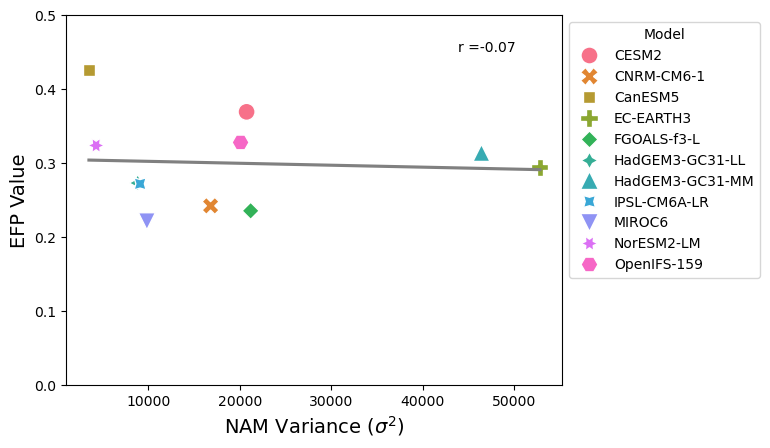

In [69]:
sns.regplot(data=df_nam, y='NH_Feedback_DJF', x='nam_variance', scatter_kws={'color': 'white'}, line_kws={"color": "gray"}, ci=None)
sns.scatterplot(data=df_nam, y='NH_Feedback_DJF', x='nam_variance', hue='model', style='model', s=150)

# Insert Pearson's correlation
r, p = sp.stats.pearsonr(x=df_nam['nam_variance'], y=df_nam['NH_Feedback_DJF'])
ax = plt.gca()
plt.text(.79, .9, "r ={:.2f}".format(r), transform=ax.transAxes)

plt.xlabel('NAM Variance ($\sigma^2$)', fontsize=14)
plt.ylabel('EFP Value', fontsize=14)
plt.ylim(0,0.5)
plt.legend(bbox_to_anchor=(1,1), title='Model')
plt.savefig('./plots/nam_var_DJF_vs_EFP.png')
plt.show()

# Combined

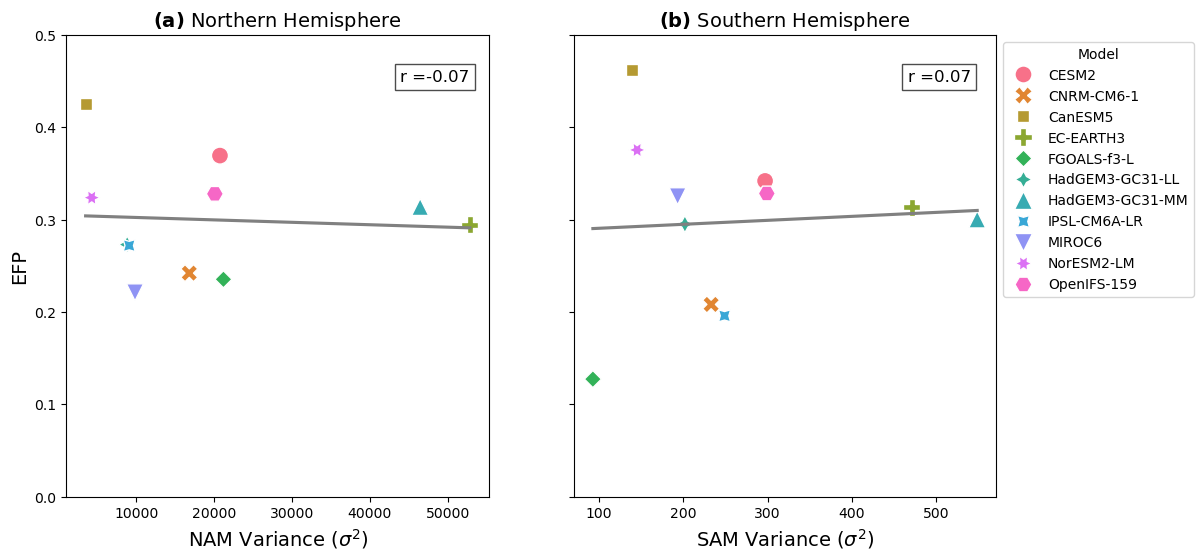

In [76]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

sns.regplot(data=df_nam, y='NH_Feedback_DJF', x='nam_variance', ax=axes[0], scatter_kws={'color': 'white'}, line_kws={"color": "gray"}, ci=None)
sns.scatterplot(data=df_nam, y='NH_Feedback_DJF', x='nam_variance', hue='model', style='model', s=150, ax=axes[0])
axes[0].set_xlabel('NAM Variance ($\sigma^2$)', fontsize=14)
axes[0].set_ylabel('EFP', fontsize=14)
axes[0].set_title('$\\bf{(a)}$ Northern Hemisphere', fontsize=14)
axes[0].get_legend().remove()

sns.regplot(data=df_sam, y='SH_Feedback_JAS', x='sam_variance', ax=axes[1], scatter_kws={'color': 'white'}, line_kws={"color": "gray"}, ci=None)
sns.scatterplot(data=df_sam, y='SH_Feedback_JAS', x='sam_variance', hue='model', style='model', s=150, ax=axes[1])
axes[1].get_legend().remove()
axes[1].set_xlabel('SAM Variance ($\sigma^2$)', fontsize=14)
axes[1].set_ylabel('', fontsize=14)
axes[1].set_title('$\\bf{(b)}$ Southern Hemisphere', fontsize=14)

# Insert Pearson's correlation
r, p = sp.stats.pearsonr(x=df_sam['sam_variance'], y=df_sam['SH_Feedback_JAS'])
ax = axes[1]
plt.text(.79, .9, "r ={:.2f}".format(r), transform=ax.transAxes, 
         bbox=dict(facecolor="white", alpha=0.7), fontsize=12)
r, p = sp.stats.pearsonr(x=df_nam['nam_variance'], y=df_nam['NH_Feedback_DJF'])
ax = axes[0]
plt.text(.79, .9, "r ={:.2f}".format(r), transform=ax.transAxes, 
         bbox=dict(facecolor="white", alpha=0.7), fontsize=12)


plt.ylim(0,0.5)
plt.legend(bbox_to_anchor=(1,1), title='Model')

# plt.tight_layout()
plt.savefig('./plots/combined_sam_nam_var_vs_EFP.png', dpi=300, bbox_inches='tight')
plt.show()

# NAM vs SAM variance

In [71]:
df = pd.merge(df_nam, df_sam, on='model', how='outer')
df

,model,nam_variance,NH_Feedback_DJF,sam_variance,SH_Feedback_JAS
0,CESM2,20738.21,0.3693,297.06,0.3419
1,CNRM-CM6-1,16797.78,0.2421,232.99,0.2082
2,CanESM5,3485.68,0.4256,138.52,0.4618
3,EC-EARTH3,52837.83,0.2945,471.31,0.3135
4,FGOALS-f3-L,21184.31,0.2354,92.52,0.1274
5,HadGEM3-GC31-LL,8823.29,0.2730,201.83,0.2951
6,HadGEM3-GC31-MM,46447.08,0.3137,549.04,0.3002
7,IPSL-CM6A-LR,9085.22,0.2719,248.92,0.1959
8,MIROC6,9828.57,0.2213,193.18,0.3253
9,NorESM2-LM,4271.22,0.3238,145.07,0.3754


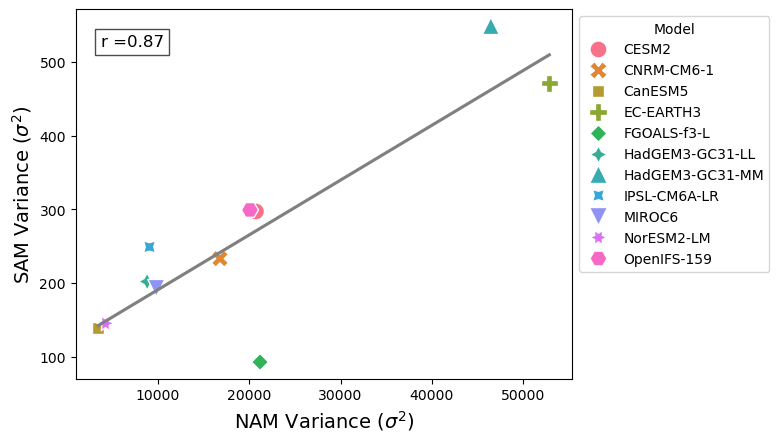

In [75]:
sns.regplot(data=df, y='sam_variance', x='nam_variance', scatter_kws={'color': 'white'}, line_kws={"color": "gray"}, ci=None)
sns.scatterplot(data=df, y='sam_variance', x='nam_variance', hue='model', style='model', s=150)

# Insert Pearson's correlation
r, p = sp.stats.pearsonr(x=df['nam_variance'], y=df['sam_variance'])
ax = plt.gca()
plt.text(.05, .9, "r ={:.2f}".format(r), transform=ax.transAxes, 
         bbox=dict(facecolor="white", alpha=0.7), fontsize=12)

plt.xlabel('NAM Variance ($\sigma^2$)', fontsize=14)
plt.ylabel('SAM Variance ($\sigma^2$)', fontsize=14)
# plt.ylim(0,0.5)
plt.legend(bbox_to_anchor=(1,1), title='Model')
plt.savefig('./plots/variance_nam_vs_sam.png', dpi=300, bbox_inches='tight')
plt.show()